<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

This project is focused on exploratory data analysis (EDA). EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to pitfalls and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those beyond this class!

Problems 1 thru 6 use a small dataset on state SAT scores.

Problems 7 thru 12 use a fraction of the Iowa Liquor Sales dataset (described in more detail in question 7).

---

This project includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like stackoverflow that have almost certainly done what you are trying to do.

**Get used to using google for finding code!** You will be using it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put in dictionary format.

The dictionary format for data will be keys as the column names/headers, and values as the row values for that column.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [32]:
sat_filepath = '../../datasets/state_sat_scores/sat_scores.csv'

In [33]:
reader = csv.DictReader(open(sat_filepath))
  
sat_dict = {}
for row in reader:
    for column, value in row.iteritems():
        sat_dict.setdefault(column, []).append(value)
print sat_dict


{'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '592', '566', '506'], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4'

### 1.2 Make a pandas DataFrame object with the sat dictionary and also with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [34]:
pd.DataFrame(data = sat_dict).dtypes

Math      object
Rate      object
State     object
Verbal    object
dtype: object

In [35]:
pd.read_csv(sat_filepath).dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values). 

### 1.3 Look at the first ten rows of the DataFrame and describe what the data appears to be. 

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [36]:
sat_df = pd.read_csv(sat_filepath)
sat_df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [37]:
sat_df.shape

(52, 4)

### Data Dictionary:
- The size of the SAT DataFrame is (52,4), including information on 50 states, plus DC and an 'All' row.
- Below is a summary table of the vaiables in the dataset:

| Variable Name    | Variable Description                          | Variable Type  | 
| :--------------  |:------------------------------------          | :------------- |
| State            | Abbreviation for each State, and an 'all' row | object         | 
| Rate             | Participation rate for each state             | int64          |
| Verbal           | Mean SAT verbal scores for each state         | int64          | 
| Math             | Mean SAT math scores for each state           | int64          | 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [38]:
# Delete All row
sat_df = sat_df[0: len(sat_df)-1]

In [39]:
sat_df

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


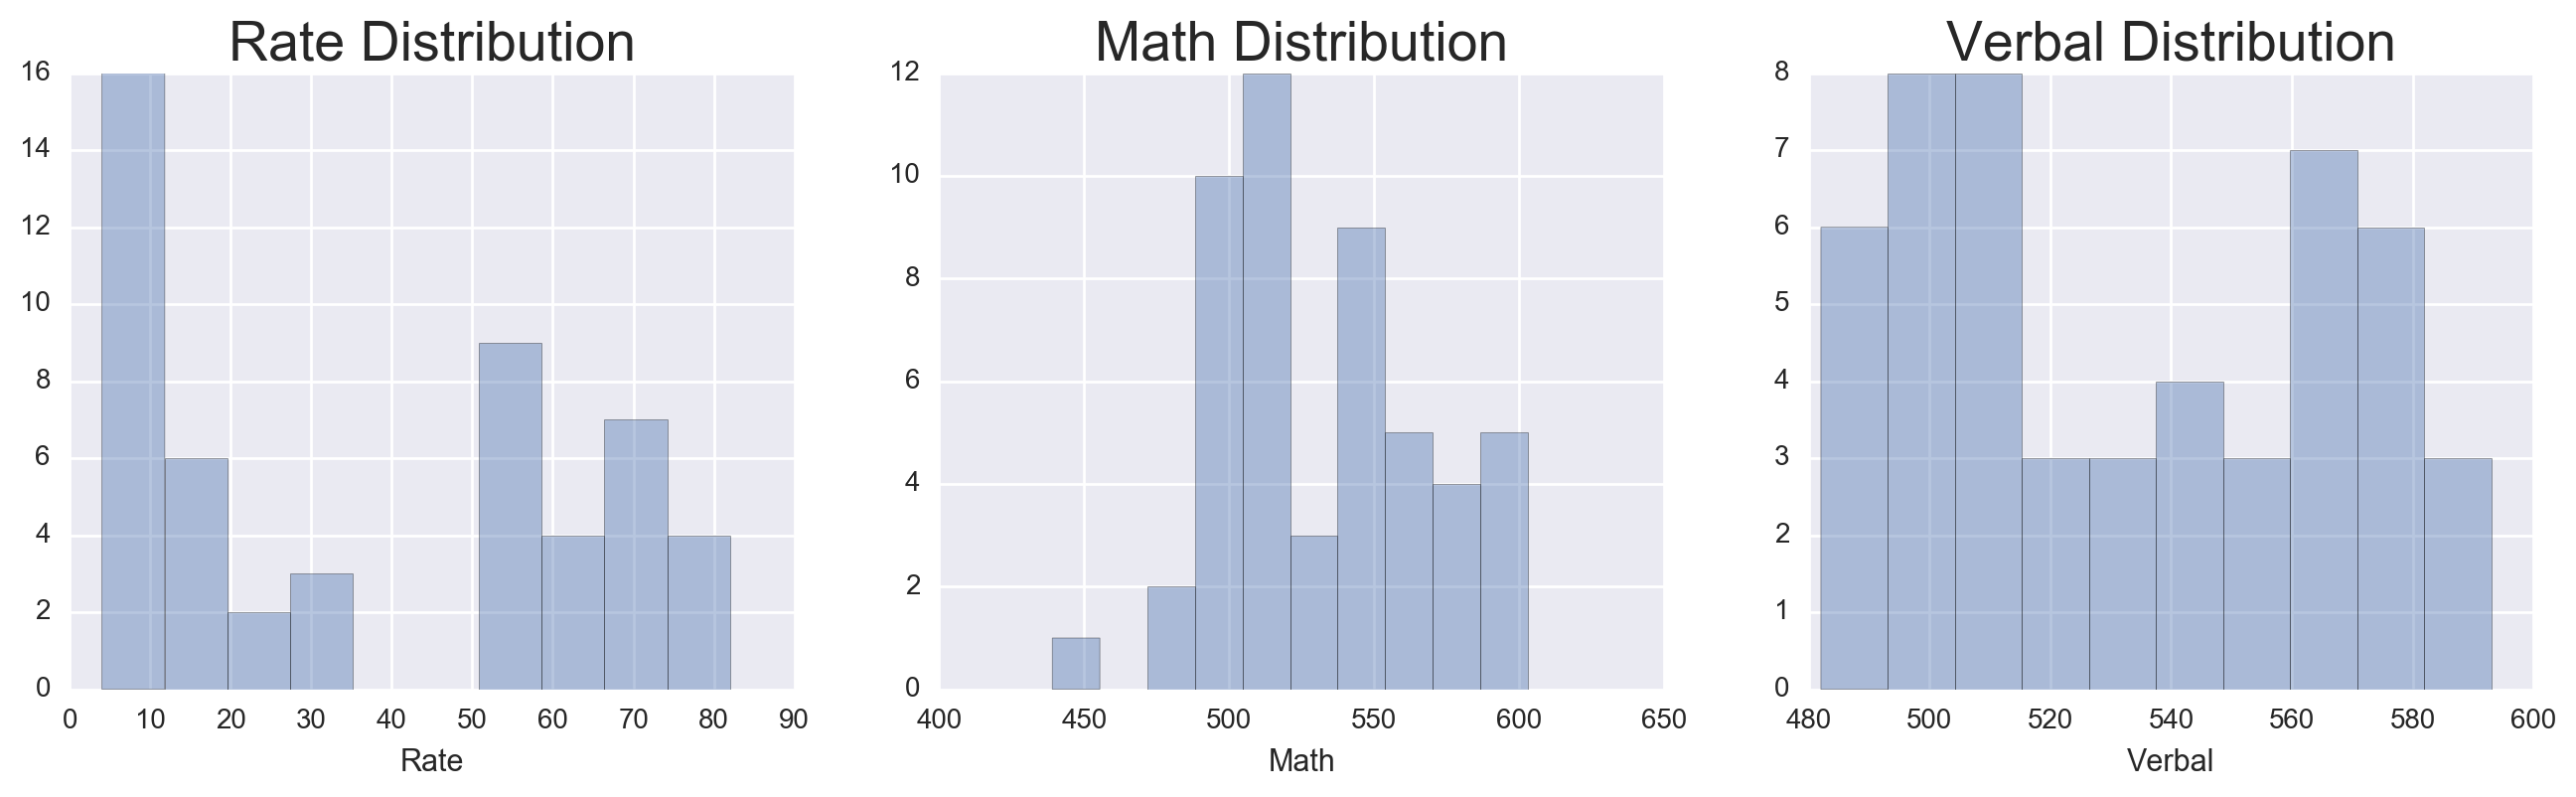

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis_array = plt.subplots(1,3, figsize=(16,4)) 

axis1, axis2, axis3 = axis_array[0], axis_array[1], axis_array[2]

axis1 = sns.distplot(sat_df['Rate'], kde=False, bins=10, ax=axis1)
axis2 = sns.distplot(sat_df['Math'], kde=False, bins=10, ax=axis2)
axis3 = sns.distplot(sat_df['Verbal'], kde=False, bins=10, ax=axis3)

axis1.set_title('Rate Distribution', fontsize=20)
axis2.set_title('Math Distribution', fontsize=20)
axis3.set_title('Verbal Distribution', fontsize=20)


### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

# Data interpretation:
- Pairplot draws scatterplots for joint relationships and histograms for univariate distributions:
- Negative correlation between state participation rates and SAT scores. i.e. states that have high participation rates have lower math and verbal average scores, and vice versa.
- Positive correlation between math and verbal scores for each state - i.e. states that have lower verbal scores tend to have lower math scores as well, and vice versa.

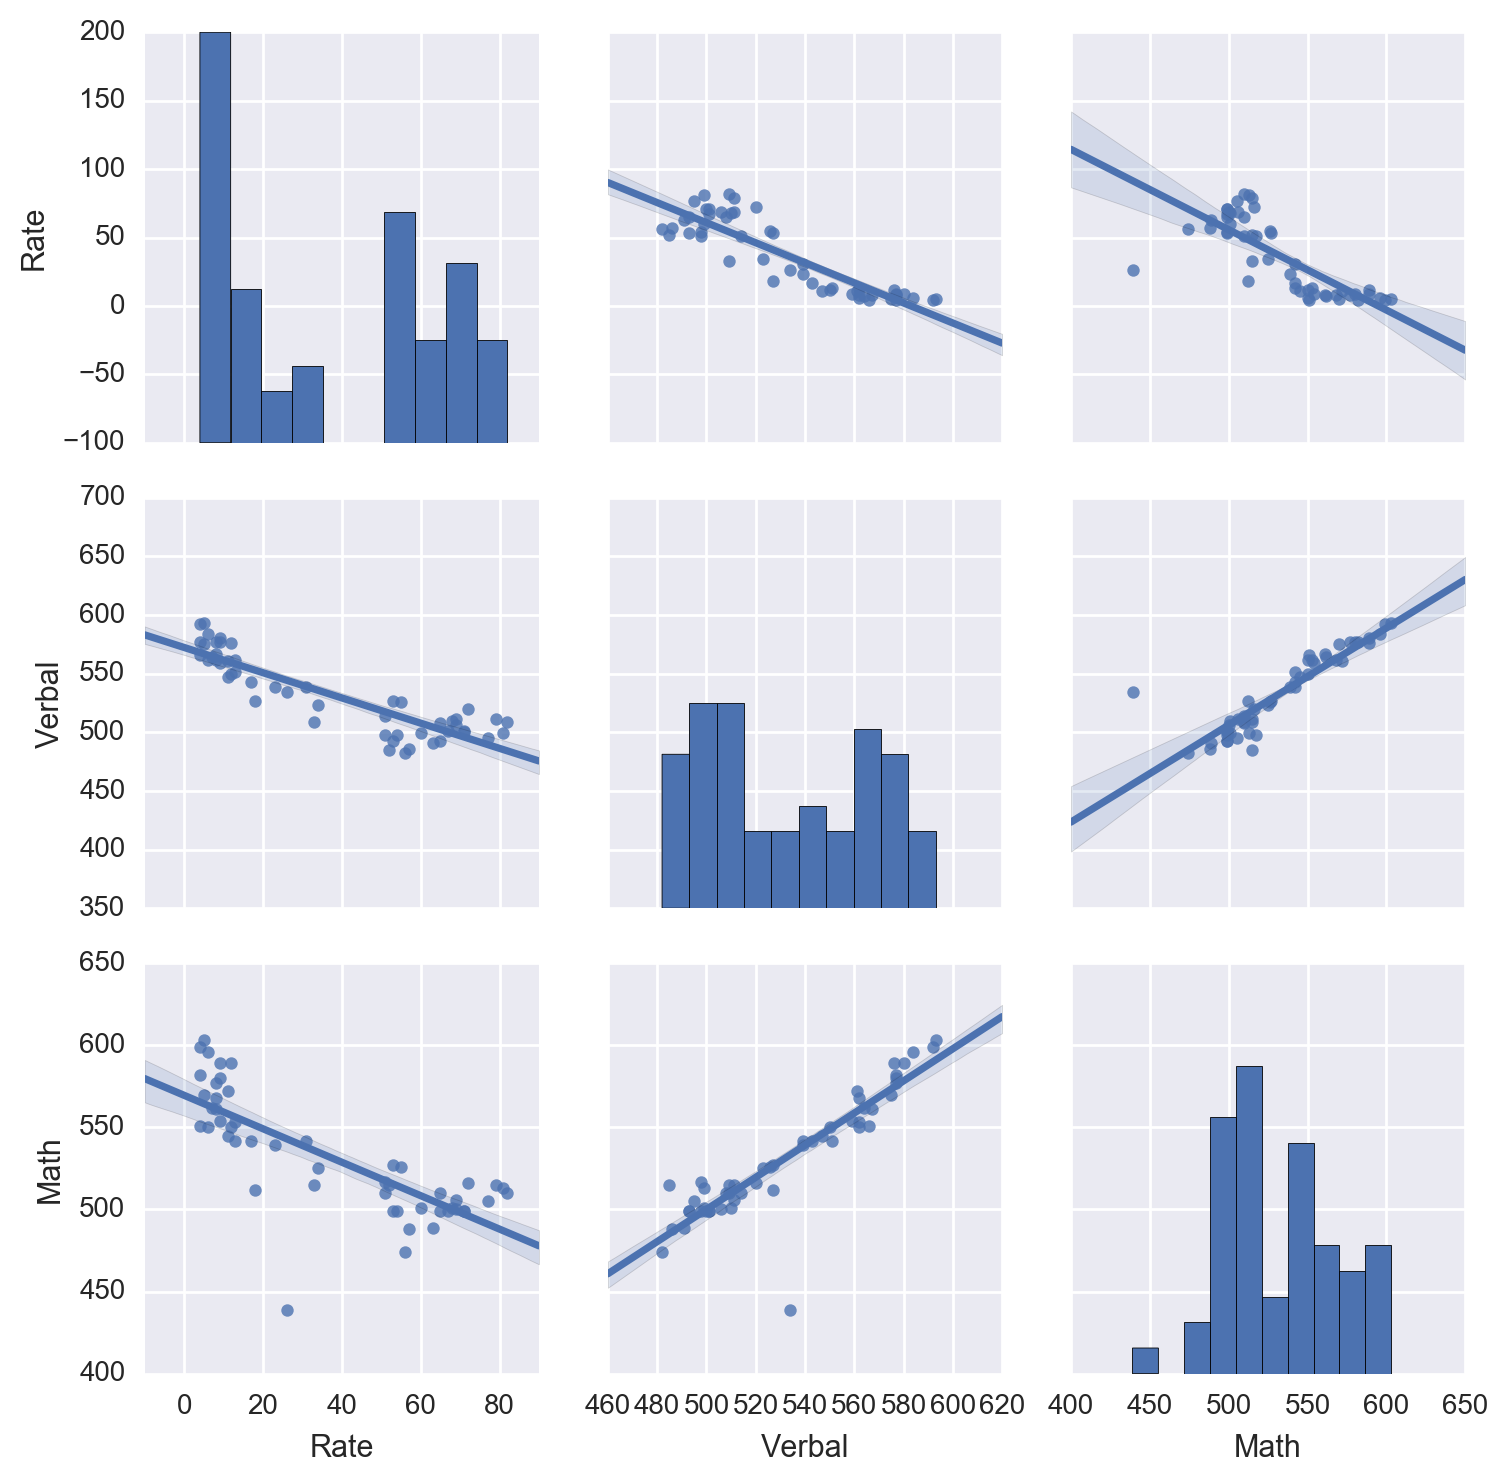

In [41]:
sns.pairplot(sat_df, kind='reg')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built in plotting functions for your data. Read the documentation here to overview and understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

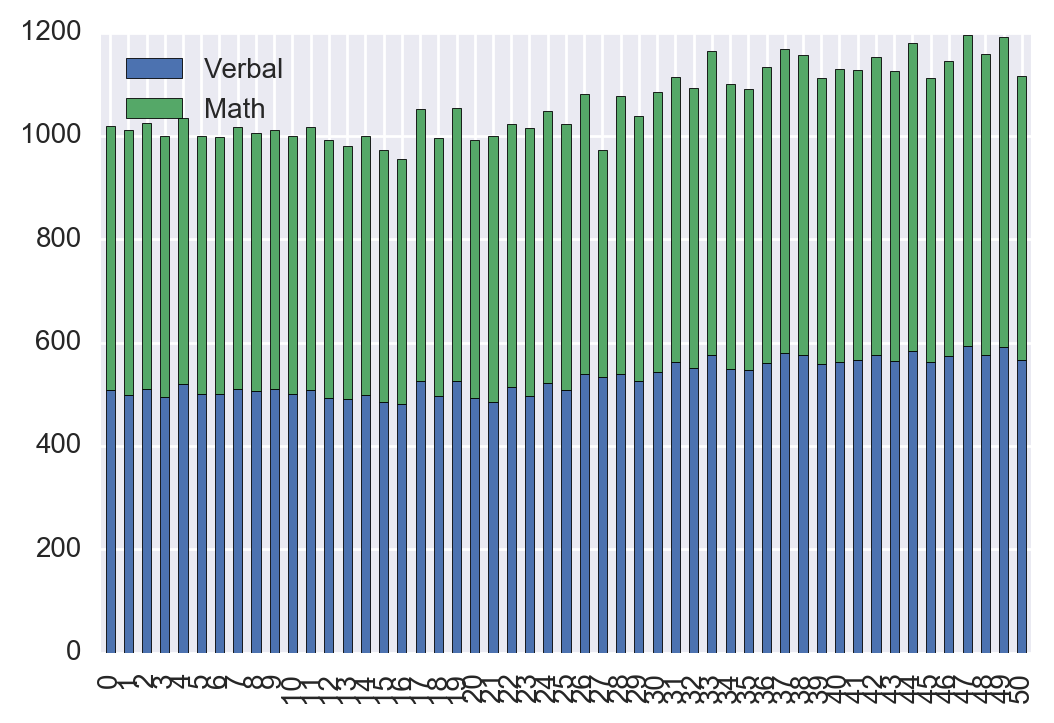

In [42]:
import matplotlib.pyplot as plt
sat_df[['Verbal','Math']].plot.bar(stacked=True)
plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots (pandas or seaborn)

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?
   - One can easily compare the median, 25-75 percentile, min and max SAT scores between math and verbal across different states using a boxplot. Scatterplot illustrates the correlation between math and verbal scores, whereas histogram illustrates distribution for each. 

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?
   - The range of rate is from 0-100, which is on a different scale than Math and Verbal scores.

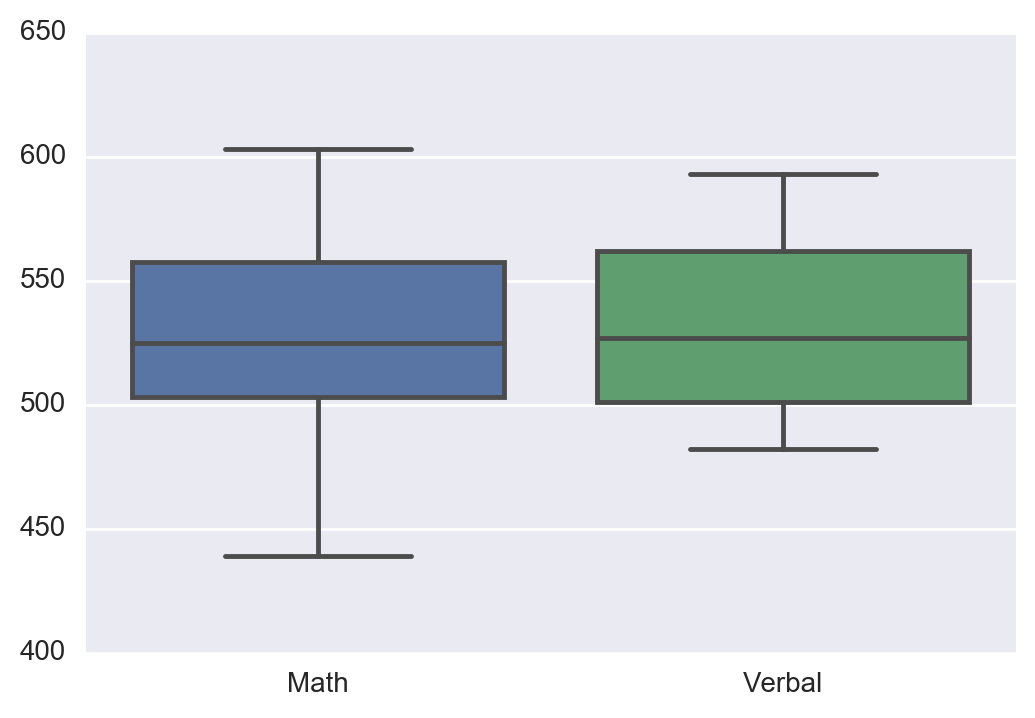

In [43]:
sns.boxplot(sat_df[['Math', 'Verbal']])

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart (pandas or seaborn)

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


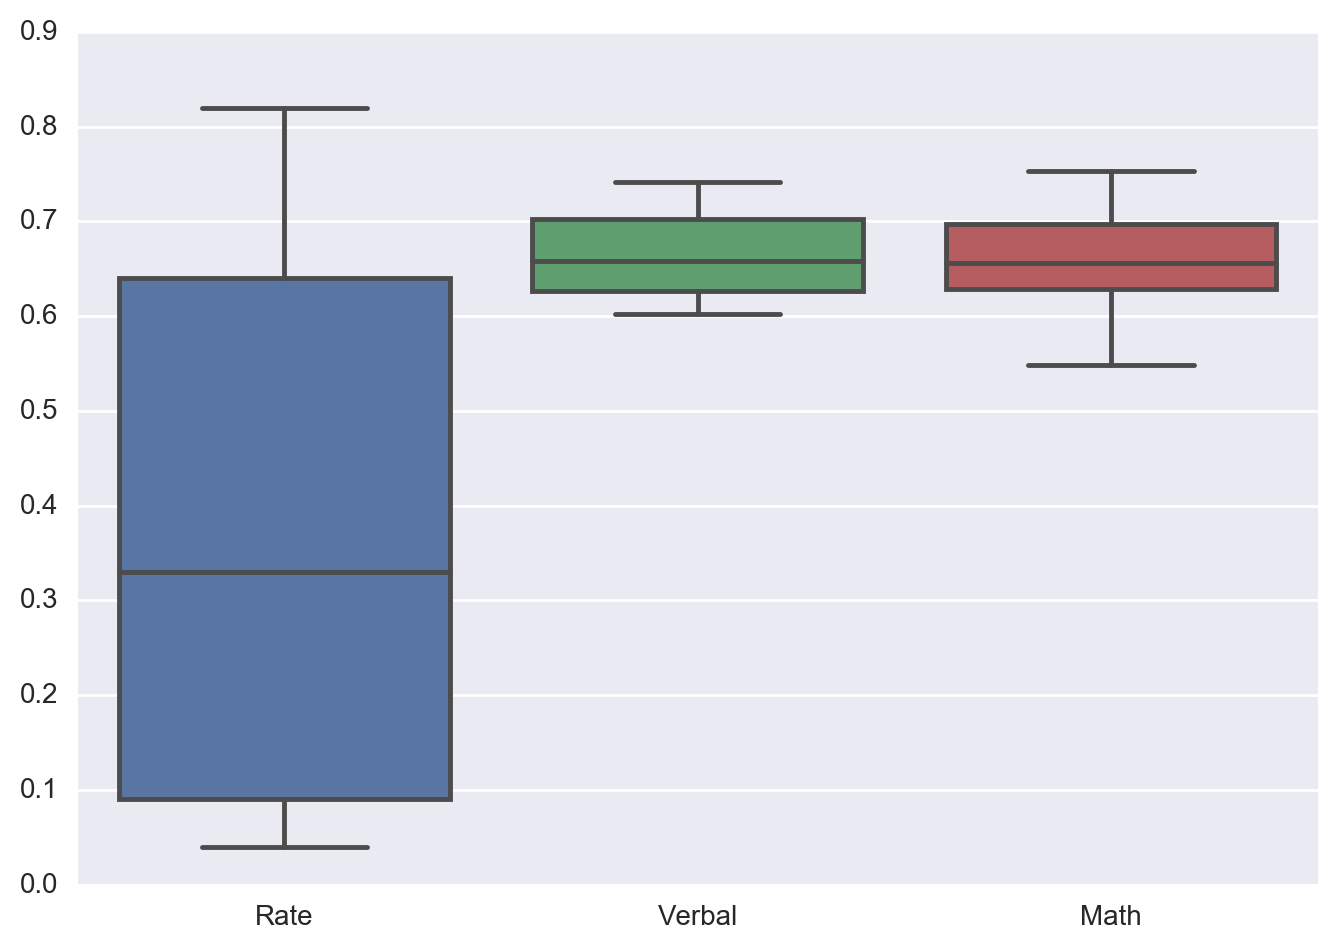

In [14]:
# I normalized the data as a percentage. The prefect scores for SAT's are 800, and the rate is 100%.
sat_df['Rate'] = sat_df['Rate'] / 100.
sat_df['Math'] = sat_df['Math'] / 800.
sat_df['Verbal'] = sat_df['Verbal'] / 800.
sns.boxplot(sat_df)

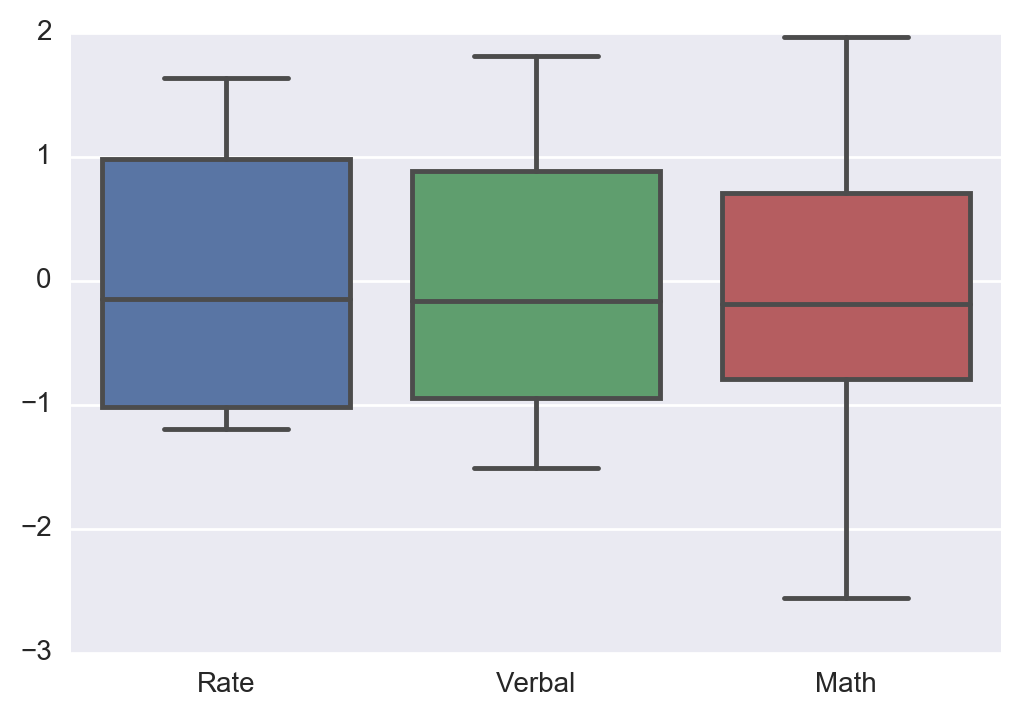

In [28]:
# Re-run the data up to the cell before the last one. 
# Data is normalized with mean=0 and std=1. This is useful in terms of seeing distributions over the three variables.
# It does not make much sense to extrapolate data for each variable from this graph.

sat_df['Rate'] = (sat_df['Rate'] - sat_df['Rate'].mean()) / sat_df['Rate'].std()
sat_df['Math'] = (sat_df['Math'] - sat_df['Math'].mean()) / sat_df['Math'].std()
sat_df['Verbal'] = (sat_df['Verbal'] - sat_df['Verbal'].mean()) / sat_df['Verbal'].std()
sns.boxplot(sat_df)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Recall that masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?



  - 24 out of 51 states are above the mean. This distribution is slightly right skewed.

In [44]:
sat_df[sat_df['Verbal'] > sat_df['Verbal'].mean()]

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [45]:
print sat_df['Verbal'].mean(), sat_df['Verbal'].median()

532.529411765 527.0


 - This is the same list, because the mean of Verbal scores is 532.5 and the median is 527. There are no states on our list that has Verbal scores between the mean and median.

In [46]:
sat_df[sat_df['Verbal'] > sat_df['Verbal'].median()]

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [47]:
sat_df['Verbal - Math'] = sat_df['Verbal'] - sat_df['Math']
sat_df

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [48]:
# States with the greatest gap between Verbal and Math such that Verbal is greater than Math. 
df_Verbal_Math = sat_df.sort_values('Verbal - Math', ascending=False).reset_index().iloc[0:10]
df_Verbal_Math.head(3)

,index,State,Rate,Verbal,Math,Verbal - Math
0,27,OH,26,534,439,95
1,50,MS,4,566,551,15
2,29,WV,18,527,512,15


In [49]:
# States with the greatest gap between Verbal and Math such that Math is greater than Verbal. 
df_Math_Verbal = sat_df.sort_values('Verbal - Math', ascending=True).reset_index().iloc[0:10]
df_Math_Verbal.head(3)

,index,State,Rate,Verbal,Math,Verbal - Math
0,21,HI,52,485,515,-30
1,23,CA,51,498,517,-19
2,1,NJ,81,499,513,-14


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


   - Participation rate is negatively correlated to Math and Verbal scores respectively. 
   - Verbal and math scores across the states are positively correlated.
   - There is little correlation between the Verbal-Math difference to the other variables.

In [50]:
sat_df.corr()

,Rate,Verbal,Math,Verbal - Math
Rate,1.000000,-0.888121,-0.773419,-0.098671
Verbal,-0.888121,1.000000,0.899909,0.044527
Math,-0.773419,0.899909,1.000000,-0.395574
Verbal - Math,-0.098671,0.044527,-0.395574,1.000000


### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

 ### .describe( ):


| Variable Name | Description                           | 
| :-------------|:--------------------------------------| 
| count         | count of entries, including NaN values| 
| mean          | mean of each variable                 |
| std           | standard deviation of each variable   | 
| min           | minimum value of each variable        | 
| 25%           | 25 percentile                         | 
| 50%           | 50 percentile                         | 
| 75%           | 75 percentile                         | 
| max           | maximum value of each variable        | 

In [51]:
sat_df.describe()

,Rate,Verbal,Math,Verbal - Math
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

# Answer
 1. Covariance measures how two variables change together. It is positive if they change in the same direction, and vice versa. Covariances are hard to compare. Therefore by 'normalizing' covariances, we have correlation, which is a measure of linear dependence between two variables having a value betwen -1 and 1.
 2. Correlation is calculated by taking the covariance and dividing it by the product of both variables' standard deviation.
 3. Correlation matrix is preferred to the covariance matrix because it 'normalizes' the relationship of the two variables on a scale between -1 and 1. The magnitude is easily interpreted, whereas 1 represents a perfect positive correlation, -1 represents a perfect negative correlation and 0 represents no correlation between the two variables.

In [52]:
sat_covariance_matrix = sat_df.cov()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Load Iowa Liquor Sales dataset

---

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.


In [2]:
iowa_file = '../../../DSI-SF-4/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 7.1 Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [3]:
iowaliquor = pd.read_csv(iowa_file)
iowaliquor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Clean the liquor dataset

---

### 8.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

# Answer
 1. There are null/missing values in the following columns. However I am not deleting any rows just yet since I do not think these missing data interfere with the later analysis in this project and those rows retain important information.
      - County Number
      - County
      - Category
      - Categor Name columns.
 2. Convert the following object to 'float64' datatype
      - State Bottle Cost
      - State Bottle Retail 
      - Sale (Dollars) 
 3. Date column should be converted to 'datetime' datatype.
      

In [5]:
iowaliquor.describe()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons)
count,270955.000000,269878.000000,2.708870e+05,270955.00000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
mean,3590.263701,57.231642,1.043888e+06,256.43443,45974.963300,924.830341,9.871285,8.981351,2.372830
std,947.662050,27.341205,5.018211e+04,141.01489,52757.043086,493.088489,24.040912,28.913690,7.638182
min,2106.000000,1.000000,1.011100e+06,10.00000,168.000000,50.000000,1.000000,0.100000,0.030000
25%,2604.000000,NaN,NaN,115.00000,26827.000000,750.000000,2.000000,1.500000,0.400000
50%,3722.000000,NaN,NaN,260.00000,38176.000000,750.000000,6.000000,5.250000,1.390000
75%,4378.000000,NaN,NaN,380.00000,64573.000000,1000.000000,12.000000,10.500000,2.770000
max,9023.000000,99.000000,1.701100e+06,978.00000,995507.000000,6000.000000,2508.000000,2508.000000,662.540000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 8.2 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

In [6]:
iowaliquor['Date'] = pd.to_datetime(iowaliquor['Date'])
iowaliquor['State Bottle Cost'] = iowaliquor['State Bottle Cost'].map(lambda x: float(x.replace('$','')))
iowaliquor['State Bottle Retail'] = iowaliquor['State Bottle Retail'].map(lambda x: float(x.replace('$','')))
iowaliquor['Sale (Dollars)'] = iowaliquor['Sale (Dollars)'].map(lambda x: float(x.replace('$','')))

In [7]:
iowaliquor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null datetime64[ns]
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null float64
State Bottle Retail      270955 non-null float64
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null float64
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: datetim

In [8]:
iowaliquor.head(3)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to handle missing data for stores not open for the full 2015 year. Do you impute? Remove the stores? Something else?
3. Implement your plan.
4. Briefly report on what you did and why.


# Answer
# Plan of Action
1. Get a handle of how many stores we have in the data - 1,400 for both 2015 and 2016, out of which 1,372 stores are for 2015.
2. Extrapoloate Year and Month as separate columns in the df.
3. Create a new df_2015 that only contains data from year 2015.
4. Create new dataframes with df_2015 where Month=1 (df_m1) and Month=12 (df_m12).
5. Merge df_m1 and df_m12 on "Store Number", get unique store numbers. There are the stores that opened for the entire 2015 fiscal year. There are 1,047 of them.
    - My assumption is - as long as count is not 0 for month 1 and 12 for each store, the store opened for the entire fiscal year.
6. TO DO - How can I apply this unique store list as a mask to filter out the data. 
    - compare lists to create a list of stores to drop
    - make Store Number as row indices
    - .drop([above list])

In [9]:
# Step 1 - Get a handle of how many stores we have in the data 

iowaliquor['Store Number'].unique().shape

(1400,)

In [10]:
# Step 2 - Extrapoloate Year and Month as separate columns in the df.

iowaliquor.insert(1,'Year', iowaliquor['Date'].map(lambda x: x.year))
iowaliquor.insert(2,'Month', iowaliquor['Date'].map(lambda x: x.month))

In [11]:
iowaliquor.head(3)

,Date,Year,Month,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,2015,11,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2016,3,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2016,2,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34


In [12]:
# Step 3 - Create a new df_2015 that only contains data from year 2015.

df_2015 = iowaliquor[iowaliquor['Year']==2015]
df_2015.head(3)

,Date,Year,Month,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,2015,11,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
4,2015-08-18,2015,8,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55
5,2015-04-20,2015,4,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.5,2.77


In [13]:
# Step 4 Create df's from year 2015 where month is 1 and 12

df_m1 = df_2015[df_2015['Month'] == 1]
df_m12 = df_2015[df_2015['Month'] == 12]

In [14]:
df_m1_m12 = df_m1.merge(df_m12, how='inner', on='Store Number', suffixes=('_m1', '_m12'))

In [15]:
Store_Number_2015 = df_m1_m12['Store Number'].unique()
Store_Number_2015.shape

(1047,)

In [16]:
Store_Number_2015

array([3858, 2590, 3942, ..., 4690, 4136, 4476])

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Examine liquor profits

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 10.1 Calculate yearly liquor sales for each store in 2015.

In [17]:
df_2015.groupby(['Store Number'])[['Sale (Dollars)']].sum().sort_values('Sale (Dollars)', ascending=False).reset_index().head()

,Store Number,Sale (Dollars)
0,2633,1000783.30
1,4829,878812.70
2,3385,441983.55
3,2512,419746.83
4,3420,352020.66


### 10.2 Calculate the profit each store is making in 2015.


In [18]:
df_2015.insert(18, 'Profit', (df_2015['State Bottle Retail'] - df_2015['State Bottle Cost']) * df_2015['Bottles Sold'])

In [19]:
df_2015.groupby('Store Number')[['Profit']].sum().sort_values('Profit', ascending=False).reset_index().head()

,Store Number,Profit
0,2633,333816.91
1,4829,293196.99
2,3385,147884.62
3,2512,140143.46
4,3420,117593.34


### 10.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [21]:
df_2015['Profit_per_gallon'] = df_2015['Profit'] / df_2015['Volume Sold (Gallons)']
df_2015.head(3)


/Users/wg/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Date,Year,Month,Store Number,City,Zip Code,County Number,County,Category,Category Name,...,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Profit,Volume Sold (Liters),Volume Sold (Gallons),Profit_per_gallon
0,2015-11-04,2015,11,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,...,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,27.00,9.0,2.38,11.344538
4,2015-08-18,2015,8,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,...,Five O'clock Vodka,1750,7.20,10.80,12,129.60,43.20,21.0,5.55,7.783784
5,2015-04-20,2015,4,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,...,New Amsterdam Gin,1750,13.32,19.98,6,119.88,39.96,10.5,2.77,14.425993


In [22]:
df_2015.groupby('County')[['Profit_per_gallon']].sum().sort_values('Profit_per_gallon', ascending=False).reset_index().head()

,County,Profit_per_gallon
0,Polk,979948.172523
1,Linn,450094.713966
2,Scott,323548.915015
3,Black Hawk,285092.638840
4,Johnson,261311.412450


### 10.4 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [23]:
df_2015['Category Name'].unique()  

array(['APRICOT BRANDIES', 'VODKA 80 PROOF', 'AMERICAN DRY GINS',
       'AMERICAN GRAPE BRANDIES', 'CANADIAN WHISKIES', 'CINNAMON SCHNAPPS',
       'SINGLE BARREL BOURBON WHISKIES', 'AMERICAN COCKTAILS',
       'VODKA FLAVORED', 'DISTILLED SPIRITS SPECIALTY', 'BLENDED WHISKIES',
       'TEQUILA', 'TENNESSEE WHISKIES', 'WHISKEY LIQUEUR',
       'MISC. AMERICAN CORDIALS & LIQUEURS', 'APPLE SCHNAPPS',
       'CHERRY BRANDIES', 'MISC. IMPORTED CORDIALS & LIQUEURS',
       'IMPORTED DRY GINS', 'WATERMELON SCHNAPPS', 'BLACKBERRY BRANDIES',
       'SINGLE MALT SCOTCH', 'SPICED RUM', 'IMPORTED VODKA',
       'CREAM LIQUEURS', 'SCOTCH WHISKIES', '100 PROOF VODKA',
       'STRAIGHT BOURBON WHISKIES', 'IMPORTED VODKA - MISC',
       'IRISH WHISKIES', 'FLAVORED RUM', 'SPEARMINT SCHNAPPS',
       'PUERTO RICO & VIRGIN ISLANDS RUM', 'TRIPLE SEC',
       'AMERICAN AMARETTO', 'IMPORTED SCHNAPPS', 'STRAIGHT RYE WHISKIES',
       'MISCELLANEOUS  BRANDIES', 'PEPPERMINT SCHNAPPS',
       'STRAWBERRY SCHN

In [24]:
def broader_category(x):
    x = str(x)
    if 'BRANDIES' in x:
        return 'Brandy'
    elif 'GINS' in x:
        return 'Gin'
    elif 'VODKA' in x:
        return 'Vodka'
    elif 'SCHNAPPS'in x:
        return 'Schnapp'
    elif 'RUM' in x:
        return 'Rum'
    elif 'WHISKIES' in x or 'BOURBON' in x or 'RYE' in x or 'SCOTCH' in x:
        return 'Whisky'
    elif 'TEQUILA' in x:
        return 'Tequila'
    elif 'BEER' in x:
        return 'Beer'
    elif 'COCKTAILS' in x or 'ALCOHOL' in x or 'SPECIALTY' in x:
        return 'Miscellaneous'
    elif 'nan' in x:
        return 'nan'
    else:
        return 'Liqueur'
    
df_2015['Broad Category'] = df_2015['Category Name'].map(broader_category)



/Users/wg/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [25]:
df_2015.head()

,Date,Year,Month,Store Number,City,Zip Code,County Number,County,Category,Category Name,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Profit,Volume Sold (Liters),Volume Sold (Gallons),Profit_per_gallon,Broad Category
0,2015-11-04,2015,11,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,...,750,4.50,6.75,12,81.00,27.00,9.00,2.38,11.344538,Brandy
4,2015-08-18,2015,8,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,...,1750,7.20,10.80,12,129.60,43.20,21.00,5.55,7.783784,Vodka
5,2015-04-20,2015,4,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,...,1750,13.32,19.98,6,119.88,39.96,10.50,2.77,14.425993,Gin
6,2015-08-05,2015,8,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,...,750,6.66,9.99,3,29.97,9.99,2.25,0.59,16.932203,Brandy
7,2015-06-25,2015,6,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,...,1750,15.75,23.63,2,47.26,15.76,3.50,0.92,17.130435,Whisky


### 10.5 Do relationships exist between the broader liquor type and profit?

In [26]:
df_2015.groupby('Broad Category')[['Profit']].sum().reset_index().sort_values('Profit', ascending=False)

,Broad Category,Profit
9,Whisky,3001992.82
8,Vodka,2278921.68
5,Rum,1260944.29
3,Liqueur,1149177.59
7,Tequila,521141.83
1,Brandy,397357.70
6,Schnapp,334718.90
4,Miscellaneous,326299.29
2,Gin,256381.93
10,nan,13128.17


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 11. Proposing a new liquor tax

---

### The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

# Tax Proposal

- 3 out of top 5 profit makers are in Polk county
- Top two liquor categories that are money makers are Whisky and Vodka, with 1.8 and 1.7 million dollars in revenue each for 2015
- According to the above observations, I would propose to increase tax on hard liquor, especially Whisky and Vodka sales

In [27]:
df_2015[df_2015['County'] == 'Polk'].groupby('Broad Category').sum().sort_values('Profit', ascending=False).reset_index()

,Broad Category,Year,Month,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Profit,Volume Sold (Liters),Volume Sold (Gallons),Profit_per_gallon
0,Whisky,20401875,67714,35679856,779625.0,1.024403e+10,1917192,301890090,8752125,127343.64,191242.29,104788,1794904.25,600262.84,92166.22,24351.87,314061.346667
1,Vodka,23234965,76749,41940610,887887.0,1.189303e+10,3279445,472606296,10316425,93798.70,140888.19,158599,1699365.36,568216.26,135804.51,35882.47,223263.953168
2,Liqueur,9498710,32182,16523708,362978.0,5.099658e+09,1418108,382527324,4421184,56059.98,84143.93,53828,847187.20,282702.50,47495.83,12551.09,123659.259244
3,Rum,9053395,30110,16156164,345961.0,4.772738e+09,1028862,197099101,4151050,38243.28,57430.99,54847,752935.10,251305.81,53137.60,14038.03,85271.341085
4,Tequila,4096495,13717,7125984,156541.0,2.077929e+09,666548,181176218,1508775,29274.07,43929.03,27975,449100.01,149787.71,24162.52,6384.69,81154.327052
5,Brandy,4797715,16333,8780622,183337.0,2.503450e+09,650823,137847662,1391725,22015.74,33040.81,27033,292474.16,97581.89,12758.87,3372.74,75662.169849
6,Miscellaneous,2831075,9706,4557374,108185.0,1.603360e+09,413442,79957235,1821650,12065.01,18159.74,16622,205692.85,68957.57,22200.15,5863.44,22118.987013
7,Gin,3183700,10631,5395187,121660.0,1.645426e+09,455818,52588314,1473125,13626.41,20476.76,15317,178361.71,59614.64,12777.86,3375.55,30043.672042
8,Schnapp,2524795,8372,4206099,96481.0,1.354923e+09,308781,98950565,1024275,9058.30,13591.46,14488,166415.38,55488.03,13054.38,3449.19,22445.937900
9,nan,62465,236,104911,2387.0,2.768810e+07,4043,2167559,24000,747.03,1120.56,532,15488.97,5163.55,435.25,115.02,1791.278503


In [28]:
df_2015[df_2015['Store Number'] == 2633].groupby('Broad Category').sum().sort_values('Profit', ascending=False).reset_index()

,Broad Category,Year,Month,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Profit,Volume Sold (Liters),Volume Sold (Gallons),Profit_per_gallon
0,Vodka,934960,2938,1221712,35728.0,478681380.0,139090,24241051,408000,4846.88,7280.17,16505,238556.44,79597.71,15725.25,4154.59,10648.999479
1,Whisky,795925,2707,1040035,30415.0,399684200.0,82558,15437382,364550,6633.17,9955.28,9215,202899.80,67679.17,8982.75,2373.09,14686.389063
2,Rum,475540,1532,621388,18172.0,250693130.0,46279,11316818,227000,2086.73,3131.14,10797,160030.28,53370.02,10750.00,2839.91,4206.377906
3,Tequila,356655,1210,466041,13629.0,180911700.0,50543,15495286,162500,2883.72,4326.46,10539,149244.12,49755.58,10260.75,2710.71,6439.372131
4,Liqueur,721370,2300,942614,27566.0,387362325.0,106500,30239268,312250,4163.19,6251.73,8566,148879.47,49668.82,9092.50,2402.36,9375.102807
5,Schnapp,312325,1065,408115,11935.0,167609278.0,34674,12218161,149750,1260.41,1890.69,3568,46156.71,15387.29,3508.75,926.94,2499.972246
6,Gin,207545,680,271199,7931.0,107282500.0,26964,3945595,100750,1083.90,1627.07,1942,30036.35,10015.38,1918.75,506.92,2153.172758
7,Brandy,82615,285,107953,3157.0,43112490.0,13134,2948664,37250,629.58,946.03,583,12632.33,4218.47,492.25,130.07,1481.182255
8,Miscellaneous,124930,413,163246,4774.0,68697400.0,23783,4962765,61250,491.25,737.69,1112,9488.92,3171.43,1100.75,290.81,1056.872041
9,nan,18135,64,23697,693.0,9268700.0,1114,963190,7000,197.31,295.97,96,2858.88,953.04,78.00,20.62,491.992047


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 12. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 2 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.


In [32]:
iowaliquor['Broad Category'] = iowaliquor['Category Name'].map(broader_category)

In [33]:
iowaliquor[iowaliquor['Broad Category'] == 'Beer']

,Date,Year,Month,Store Number,City,Zip Code,County Number,County,Category,Category Name,...,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Broad Category
23586,2015-11-11,2015,11,2548,ALTOONA,50009,77.0,Polk,1501100.0,HIGH PROOF BEER - AMERICAN,...,903903,Sam Adams Utopias HA,750,95.17,142.76,1,142.76,0.75,0.2,Beer
131594,2015-11-12,2015,11,3762,WINDSOR HEIGHTS,50322,77.0,Polk,1501100.0,HIGH PROOF BEER - AMERICAN,...,903903,Sam Adams Utopias HA,750,95.17,142.76,1,142.76,0.75,0.2,Beer


In [ ]:
# Result is inconclusive for Beer